In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

from zipfile import ZipFile
zipped = ZipFile("10_food_classes_10_percent.zip", "r")
zipped.extractall()
zipped.close()

--2022-06-30 08:16:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   268MB/s    in 0.6s    

2022-06-30 08:16:36 (268 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
for path, dirs, files in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirs)} dirs and {len(files)} files in {path}")

There are 2 dirs and 0 files in 10_food_classes_10_percent
There are 10 dirs and 0 files in 10_food_classes_10_percent/train
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/fried_rice
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/ramen
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/hamburger
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/chicken_curry
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/ice_cream
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/sushi
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/pizza
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/chicken_wings
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/grilled_salmon
There are 0 dirs and 75 files in 10_food_classes_10_percent/train/steak
There are 10 dirs and 0 files in 10_food_classes_10_percent/test
There are 0 dirs and 250 files in 10_food_classes_10

In [4]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [5]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMAGE_SHAPE,
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SHAPE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for image, labels in train_data.take(1):
  print(image, labels)

tf.Tensor(
[[[[1.22790817e+02 9.77908173e+01 6.77908173e+01]
   [1.80561234e+02 1.55561234e+02 1.24561226e+02]
   [2.00494904e+02 1.75494904e+02 1.44494904e+02]
   ...
   [4.09183846e+01 2.13469105e+01 2.02856922e+01]
   [4.03367310e+01 2.13367310e+01 1.73367310e+01]
   [3.99744530e+01 2.09744530e+01 1.69744530e+01]]

  [[1.70775528e+02 1.45775528e+02 1.15775520e+02]
   [2.00015305e+02 1.75015305e+02 1.44015305e+02]
   [1.99454086e+02 1.74454086e+02 1.43454086e+02]
   ...
   [3.62142639e+01 1.73724041e+01 1.35713844e+01]
   [3.93723755e+01 2.03723736e+01 1.45050249e+01]
   [3.64951363e+01 1.94951344e+01 1.24951344e+01]]

  [[1.96234695e+02 1.71234695e+02 1.40234695e+02]
   [1.96484695e+02 1.71484695e+02 1.40484695e+02]
   [2.04760208e+02 1.79760208e+02 1.48760208e+02]
   ...
   [3.70204201e+01 1.86173420e+01 1.27397566e+01]
   [3.85611954e+01 2.15611954e+01 1.43469095e+01]
   [3.67705231e+01 2.04133816e+01 1.21990967e+01]]

  ...

  [[1.95785690e+02 1.66494904e+02 1.34857193e+02]
   [1

1. Instantiate a pre-trained base model object by choosing a target model such as [`EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) from `tf.keras.applications`, setting the `include_top` parameter to `False` (we do this because we're going to create our own top, which are the output layers for the model).
2. Set the base model's `trainable` attribute to `False` to freeze all of the weights in the pre-trained model.
3. Define an input layer for our model, for example, what shape of data should our model expect?
4. [Optional] Normalize the inputs to our model if it requires. Some computer vision models such as `ResNetV250` require their inputs to be between 0 & 1. 

> 🤔 **Note:** As of writing, the `EfficientNet` models in the `tf.keras.applications` module do not require images to be normalized (pixel values between 0 and 1) on input, where as many of the other models do. I posted [an issue to the TensorFlow GitHub](https://github.com/tensorflow/tensorflow/issues/42506) about this and they confirmed this. 

5. Pass the inputs to the base model.
6. Pool the outputs of the base model into a shape compatible with the output activation layer (turn base model output tensors into same shape as label tensors). This can be done using [`tf.keras.layers.GlobalAveragePooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) or [`tf.keras.layers.GlobalMaxPooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D?hl=en) though the former is more common in practice.
7. Create an output activation layer using `tf.keras.layers.Dense()` with the appropriate activation function and number of neurons.
8. Combine the inputs and outputs layer into a model using [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model).
9. Compile the model using the appropriate loss function and choose of optimizer.
10. Fit the model for desired number of epochs and with necessary callbacks (in our case, we'll start off with the TensorBoard callback).

In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [11]:
import datetime
def create_tensorboard_callback(dirname, experiment_name):
  log_dir = dirname + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard logs to {log_dir}")
  return tensorboard_callback

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False) # top is the output layer (which we will make on our own)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Base model shape: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After global avg pooling: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback("tensorboard_logs", "efficientnetb0-nontrainable")])

16719872/16705208 [==============================] - 0s 0us/step
Base model shape: (None, 7, 7, 1280)
After global avg pooling: (None, 1280)
Saving TensorBoard logs to tensorboard_logs/efficientnetb0-nontrainable/20220630-081650
Epoch 1/5
24/24 [==============================] - 34s 574ms/step - loss: 1.8970 - accuracy: 0.4067 - val_loss: 1.3409 - val_accuracy: 0.6896
Epoch 2/5
24/24 [==============================] - 8s 320ms/step - loss: 1.1487 - accuracy: 0.7387 - val_loss: 0.9339 - val_accuracy: 0.7924
Epoch 3/5
24/24 [==============================] - 8s 317ms/step - loss: 0.8449 - accuracy: 0.8107 - val_loss: 0.7574 - val_accuracy: 0.8200
Epoch 4/5
24/24 [==============================] - 8s 317ms/step - loss: 0.7033 - accuracy: 0.8347 - val_loss: 0.6676 - val_accuracy: 0.8348
Epoch 5/5
24/24 [==============================] - 8s 318ms/step - loss: 0.5933 - accuracy: 0.8800 - val_loss: 0.6143 - val_accuracy: 0.8412


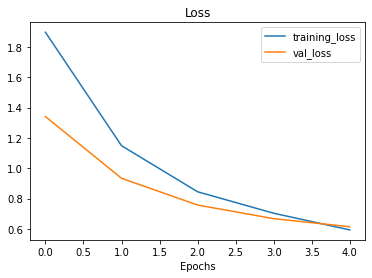

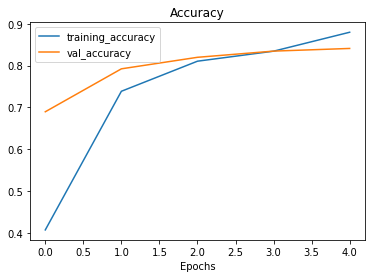

In [13]:
plot_loss_curves(history_1)

In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6143 - accuracy: 0.8412


[0.614324688911438, 0.8411999940872192]

In [16]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [17]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

## With data augmentation

In [18]:
from tensorflow.keras.layers.experimental import preprocessing

In [19]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
], name="data_augmentation")

for layer_num, layer in enumerate(data_augmentation.layers):
  print(layer_num, layer.name)

0 random_flip
1 random_rotation
2 random_zoom
3 random_height
4 random_width


(1, 512, 512, 3)


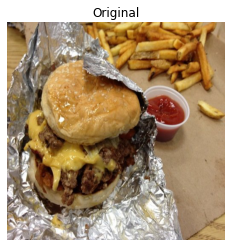

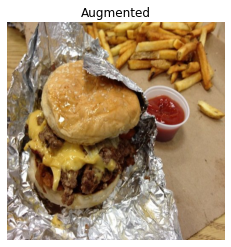

In [20]:
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
image_path = target_dir + "/" + random_image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title("Original")
plt.axis(False)

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
print(augmented_img.shape)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title("Augmented")
plt.axis(False);

In [21]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback("transfer_learning", "efficientnetb0")])

Saving TensorBoard logs to transfer_learning/efficientnetb0/20220630-081831
Epoch 1/5
24/24 [==============================] - 24s 727ms/step - loss: 2.0889 - accuracy: 0.2893 - val_loss: 1.5741 - val_accuracy: 0.6336
Epoch 2/5
24/24 [==============================] - 13s 545ms/step - loss: 1.3945 - accuracy: 0.6467 - val_loss: 1.0977 - val_accuracy: 0.7700
Epoch 3/5
24/24 [==============================] - 13s 542ms/step - loss: 1.0764 - accuracy: 0.7507 - val_loss: 0.8782 - val_accuracy: 0.7988
Epoch 4/5
24/24 [==============================] - 12s 515ms/step - loss: 0.9010 - accuracy: 0.7800 - val_loss: 0.7710 - val_accuracy: 0.8104
Epoch 5/5
24/24 [==============================] - 12s 485ms/step - loss: 0.8087 - accuracy: 0.8013 - val_loss: 0.7032 - val_accuracy: 0.8116


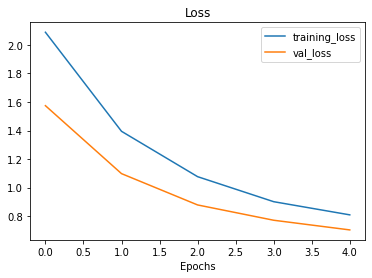

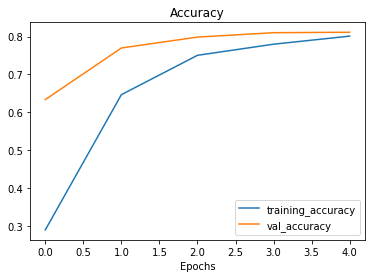

In [22]:
plot_loss_curves(history_2)

In [23]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.7032 - accuracy: 0.8116


[0.703172504901886, 0.8116000294685364]

In [24]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

## With checkpoint

In [25]:
checkpoint_path = "checkpoint_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [26]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback("transfer_learning", "efficientnetb0"),
                                   checkpoint_callback])

Saving TensorBoard logs to transfer_learning/efficientnetb0/20220630-082002
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0378 - accuracy: 0.3133
Epoch 1: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 20s 617ms/step - loss: 2.0378 - accuracy: 0.3133 - val_loss: 1.5109 - val_accuracy: 0.6216
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3816 - accuracy: 0.6480
Epoch 2: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 14s 586ms/step - loss: 1.3816 - accuracy: 0.6480 - val_loss: 1.0734 - val_accuracy: 0.7604
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0767 - accuracy: 0.7427
Epoch 3: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 13s 518ms/step - loss: 1.0767 - accuracy: 0.7427 - val_loss: 0.8681 - val_accuracy: 0.7920
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.

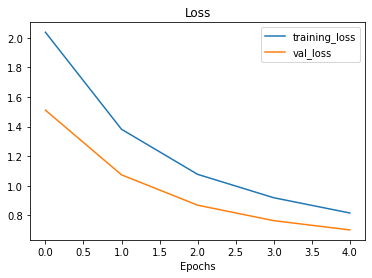

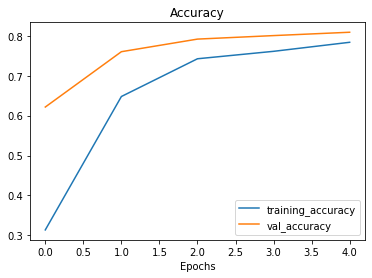

In [27]:
plot_loss_curves(history_3)

In [28]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.7007 - accuracy: 0.8092


[0.7007304430007935, 0.8091999888420105]

In [29]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

## Unfreezing some of the efficientnet model layers

In [58]:
model_3.layers[2].trainable_variables # means there isn't any trainable variables

[]

In [59]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False
for layer in base_model.layers[len(base_model.layers) - 10:]:
  layer.trainable = True
  
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pool")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [60]:
for num, layer in enumerate(base_model.layers):
  print(num, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [61]:
history_4 = model_4.fit(train_data,
            epochs=5,
            validation_data=test_data,
            validation_steps=len(test_data),
            steps_per_epoch=len(train_data),
            callbacks=[create_tensorboard_callback("transfer_learning", "efficientnetb0"),
                      checkpoint_callback])

Saving TensorBoard logs to transfer_learning/efficientnetb0/20220630-084726
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9982 - accuracy: 0.3587
Epoch 1: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 18s 522ms/step - loss: 1.9982 - accuracy: 0.3587 - val_loss: 1.5051 - val_accuracy: 0.6220
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4256 - accuracy: 0.6360
Epoch 2: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 418ms/step - loss: 1.4256 - accuracy: 0.6360 - val_loss: 1.1201 - val_accuracy: 0.7256
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1367 - accuracy: 0.7067
Epoch 3: saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 428ms/step - loss: 1.1367 - accuracy: 0.7067 - val_loss: 0.9227 - val_accuracy: 0.7632
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.

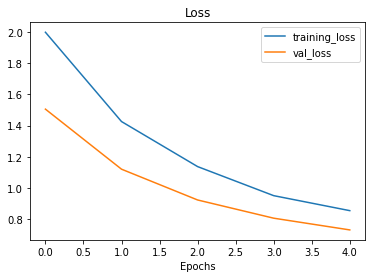

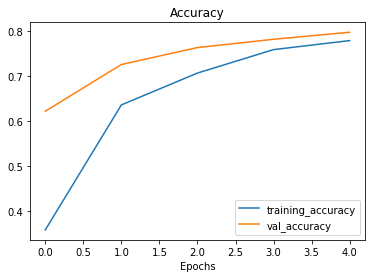

In [62]:
plot_loss_curves(history_4)

In [63]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.7307 - accuracy: 0.7972


[0.7307485342025757, 0.7972000241279602]

In [64]:
history_4 = model_4.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        initial_epoch=history_4.epoch[-1],
                        validation_steps=len(test_data),
                        steps_per_epoch=len(train_data),
                        callbacks=[create_tensorboard_callback("transfer_learning", "efficientnetb0")])

Saving TensorBoard logs to transfer_learning/efficientnetb0/20220630-084853
Epoch 5/10
24/24 [==============================] - 11s 420ms/step - loss: 0.8054 - accuracy: 0.7880 - val_loss: 0.6773 - val_accuracy: 0.8092
Epoch 6/10
24/24 [==============================] - 10s 419ms/step - loss: 0.7658 - accuracy: 0.7920 - val_loss: 0.6388 - val_accuracy: 0.8180
Epoch 7/10
24/24 [==============================] - 11s 438ms/step - loss: 0.6765 - accuracy: 0.8280 - val_loss: 0.6145 - val_accuracy: 0.8212
Epoch 8/10
24/24 [==============================] - 10s 428ms/step - loss: 0.6425 - accuracy: 0.8320 - val_loss: 0.5856 - val_accuracy: 0.8280
Epoch 9/10
24/24 [==============================] - 10s 416ms/step - loss: 0.6260 - accuracy: 0.8307 - val_loss: 0.5702 - val_accuracy: 0.8308
Epoch 10/10
24/24 [==============================] - 10s 429ms/step - loss: 0.5741 - accuracy: 0.8387 - val_loss: 0.5535 - val_accuracy: 0.8320


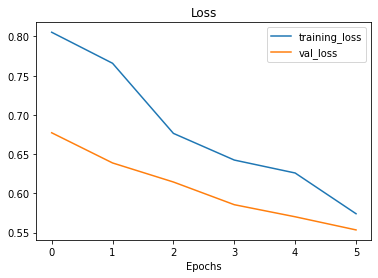

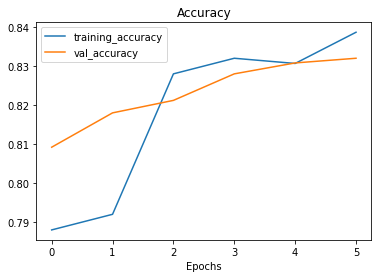

In [65]:
plot_loss_curves(history_4)

In [66]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool (GlobalAver  (None, 1280)             0         
 agePooling2D)                                                   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [67]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5535 - accuracy: 0.8320


[0.5534718632698059, 0.8320000171661377]

In [68]:
model_4.load_weights(checkpoint_path)
model_4.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.7307 - accuracy: 0.7972


[0.7307485342025757, 0.7972000241279602]